<a href="https://colab.research.google.com/github/heatherale/data_course/blob/main/HW_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_Kateryna_Khudolii_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/DataVizHomeworks/yulu_rental.csv'
df = pd.read_csv(data_path)
df

Mounted at /content/drive


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
df.shape

(10886, 19)

In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,week,weekday_num,year,month,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,9.992559,25.917784,3.013963,2011.501929,6.521495,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,5.476608,15.017269,2.004585,0.500019,3.444373,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,0.000000,2011.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,5.000000,14.0,1.000000,2011.000000,4.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,10.000000,26.0,3.000000,2012.000000,7.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,15.000000,40.0,5.000000,2012.000000,10.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,19.000000,52.0,6.000000,2012.000000,12.000000,23.000000


In [6]:
df['interval'] = df['date'].diff()
print(df['interval'].unique())

<TimedeltaArray>
[NaT, '0 days', '1 days', '13 days', '10 days', '12 days', '11 days']
Length: 7, dtype: timedelta64[ns]


In [7]:
df['hour_interval'] = df['hour'].diff()
print(df['hour_interval'].unique())

[ nan   1. -23.   2.   3. -11.]


In [8]:
print(df[df['hour_interval']==-11].index.to_list())

[Timestamp('2011-01-18 12:00:00')]


Даний набір даних складається з 10886 рядків та 19 колонок. В одному рядку даних містяться дані про 1 годину часу. Деякі години є пропущеними - або це неточності в даних, або за певні години не було замовлень на оренду. Також пропущено дані з 23:00 17 січня 2011 року до 12:00 18 січня 2011 року. Дані представлені з 1 січня 2011 року по 19 грудня 2012 року. За кожен місяць взято лише перші 19 днів.



## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


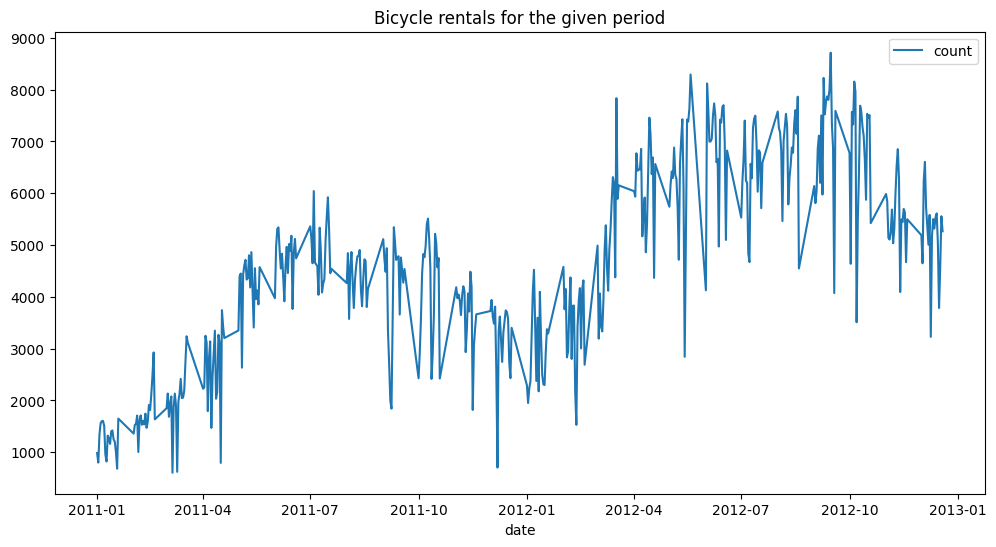

In [9]:
df_groupped_by_day = df.groupby('date').agg({'count':'sum'})
df_groupped_by_day.plot(
    figsize=(12, 6), title='Bicycle rentals for the given period'
)
plt.show()

Графік має заломи, оскільки взято досить довгий період часу для аналізу, і при цьому дані досить фрагментовані (за кожну годину окрема цифра). Оскільки кількість заявок на оренду може дуже змінюватись навіть в рамках одного дня (наприклад, більше зранку і дуже мало вночі), між окремими рядками в даних є різкий перепад. Саме тому графік має саме такий вигляд.

В загальному, на графіку видно тенденцію до зростання кількості заявок на оренду, хоч і з різкими перепадами.

Найбільш різке зростання, судячи з графіку, припадає на сезон "пізня весна-літо-рання осінь", з квітня по жовтень.

На графіку спостерігаються періоди з аномально високими та аномально низькими значеннями. Це може залежати від часу доби (очевидно що о 12-й ночі кількість заявок буде мінімальною), погодних умов, дня тижня (вихідні, свята).


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

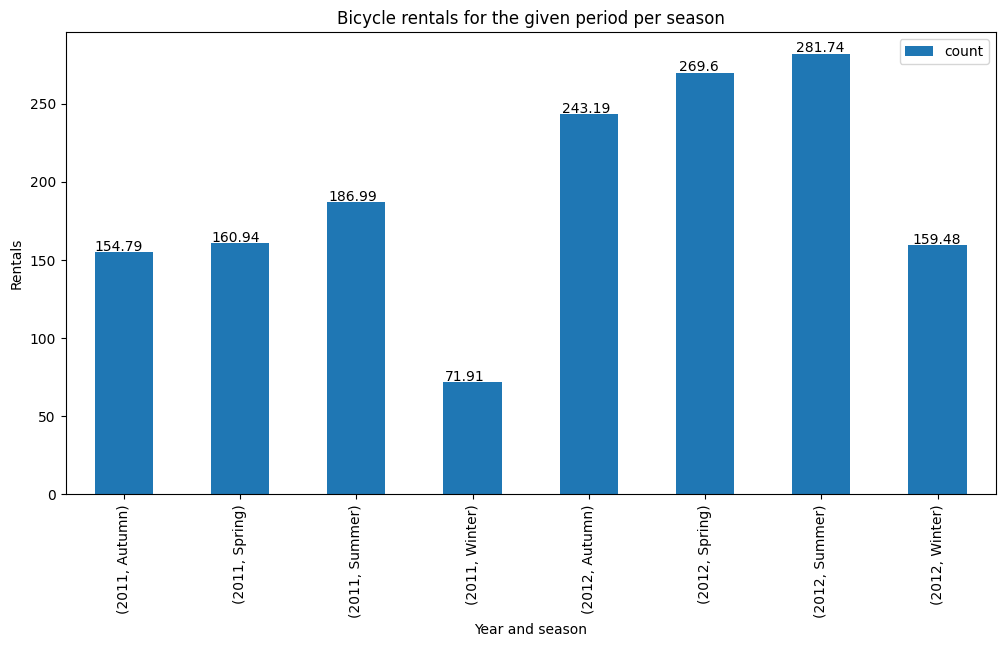

In [10]:
season_map = {
    1: "Winter",
    2: "Spring",
    3: "Summer",
    4: "Autumn"
} ##хочу зауважити, що сезони в датасеті зміщені на місяць. 1,2,3 місяці (січень, лютий та березень) - це сезон 1, далі 4,5,6 (квітень, травень, червень - сезон 2, і так далі)

df['season_name'] = df['season'].map(season_map)

df_groupped_by_season = df.groupby(['year','season_name']).agg({'count':'mean'})
ax = df_groupped_by_season.plot.bar(figsize=(12,6),title='Bicycle rentals for the given period per season')
ax.set_xlabel('Year and season')
ax.set_ylabel('Rentals')


for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

В середньому найбільше велосипедів орендують влітку - 186 заявок на годину в 2011 і 281 в 2012 відповідно. Це просто пояснити, оскільки велопрогулянки в цілому найбільш популярні влітку і найменш популярні взимку. В 2011, різниця між кількістю заявок влітку і взимку була 2.6 разів, в 2012 - 1.8 разів.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


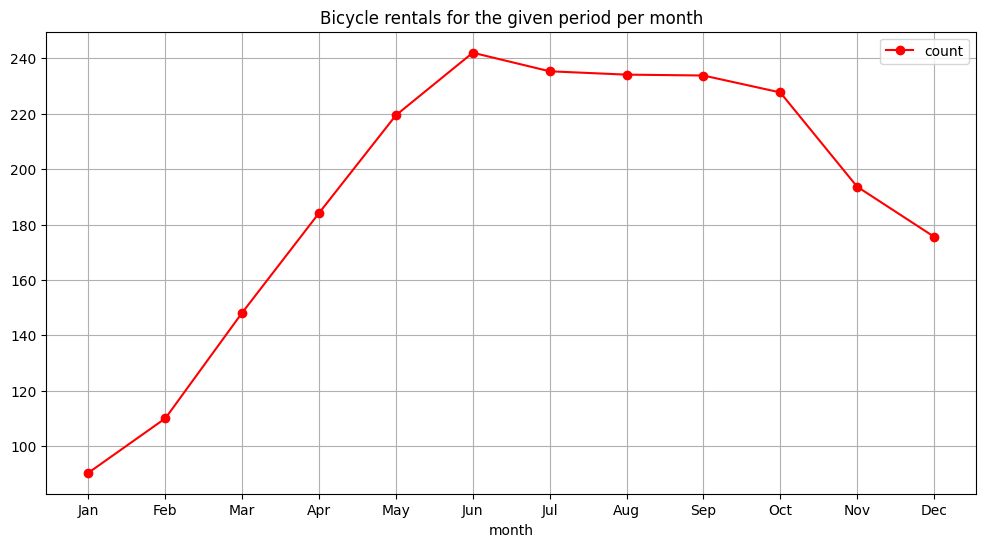

In [11]:
df_groupped_by_month = df.groupby(['month']).agg({'count':'mean'})
ax = df_groupped_by_month.plot.line(figsize=(12,6),marker='o',color='red',grid=True,title='Bicycle rentals for the given period per month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels([
    'Jan','Feb','Mar','Apr','May','Jun',
    'Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.show()

Згідно цього графіка, пік заявок на оренду припадає в червні, а найменше заявок завжди в січні та лютому. Ця тенденція цілком співпадає з попереднім графіком, де літо є піковим сезоном, а зима - найменш активним. На мою думку, клімат має прямий вплив на ці патерни. Є країни, в яких погода і влітку, і взимку дозволяє займатись велоспортом, тому в таких країнах сезонний фактор не мав би такого впливу на кількість заявок на оренду. З наведених графіків, скоріше за все, це дані з країни, де сезонність яскраво виражена (можливо це країна Східної або Центральної чи Північної Європи, чи певні штати США).

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

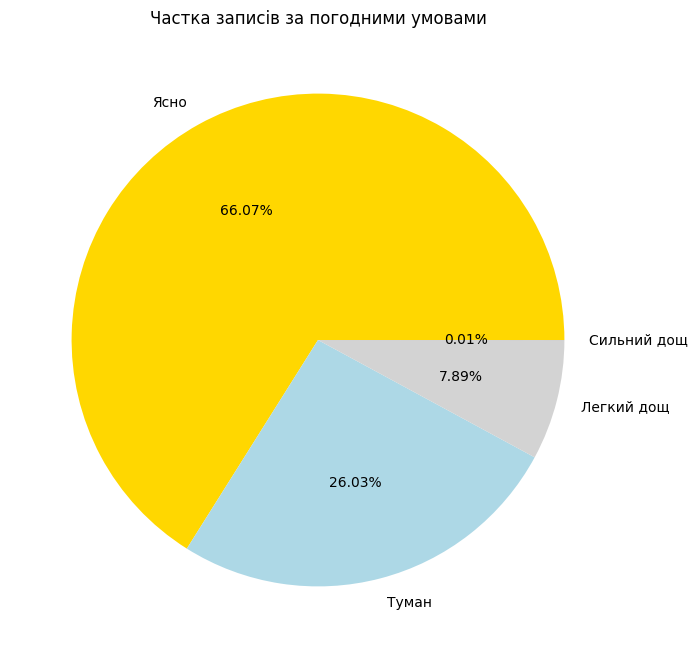

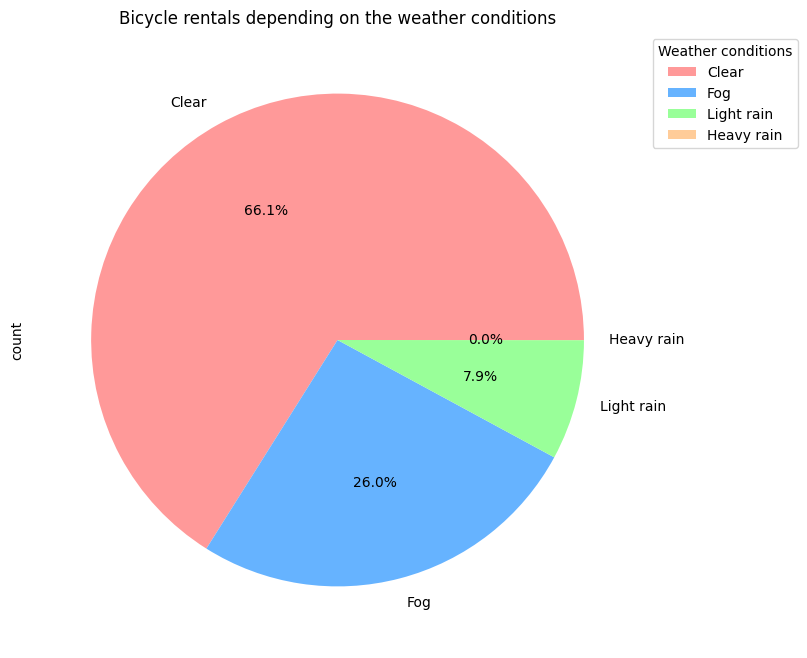

In [23]:
weather_map = {
    1: 'Clear',
    2: 'Fog',
    3: 'Light rain',
    4: 'Heavy rain'
}

df['weather_name'] = df['weather'].map(weather_map)

df_groupped_by_weather = df.groupby('weather').agg({'count':'count'})
ax = df_groupped_by_weather.plot.pie(y='count',
                                     figsize=(8,8),
                                     autopct='%1.1f%%',
                                     colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
                                     labels=[weather_map[i] for i in df_groupped_by_weather.index],
                                     title='Bicycle rentals depending on the weather conditions')
ax.legend(
    [weather_map[i] for i in df_groupped_by_weather.index],
    title="Weather conditions",
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

plt.show()

В датасеті переважає ясна погода - це логічно, бо найчастіше люди прогулюються на велосипедах в ясну та сонячну погоду. Частка ж днів із сильним дощем близька до 0 (в оригінальному датасеті я змогла знайти лише 1 запис.) Очевидно, що погодні умови мають прямий вплив на кількість заявок на оренду велосипедів.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

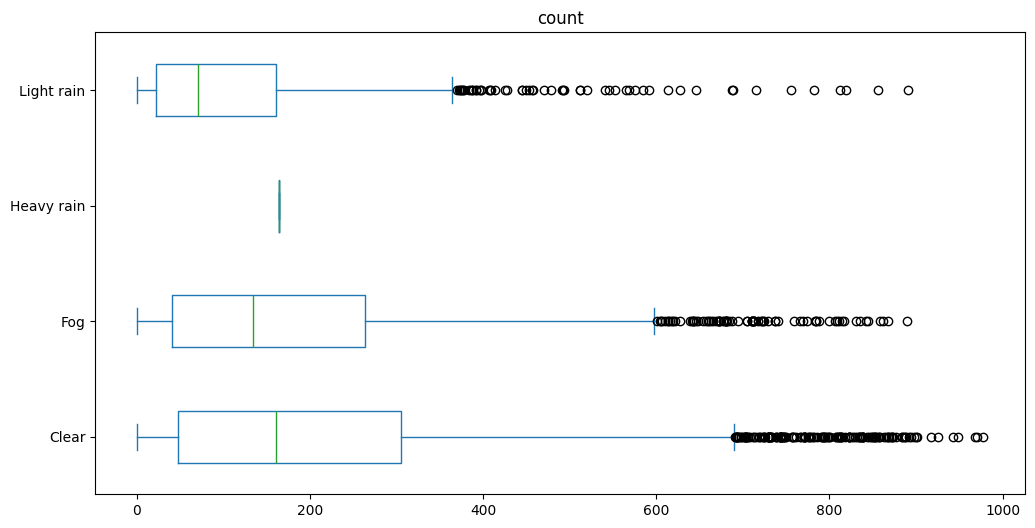

In [27]:
ax = df.plot.box(column='count',by='weather_name',vert=False,figsize=(12, 6))
plt.show()

З цього графіку видно, що найбільший розкид у вартості оренди при ясній погоді, але також є багато "викидів". В цілому видно, що викиди (аномально високі значення) є при кожній погоді, крім сильного дощу - в таких погодних умовах в нас майже нема доступних даних. Як і показав минулий графік, медіанне значення оренди найвище при ясній погоді.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

/tmp/ipython-input-2516561763.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(


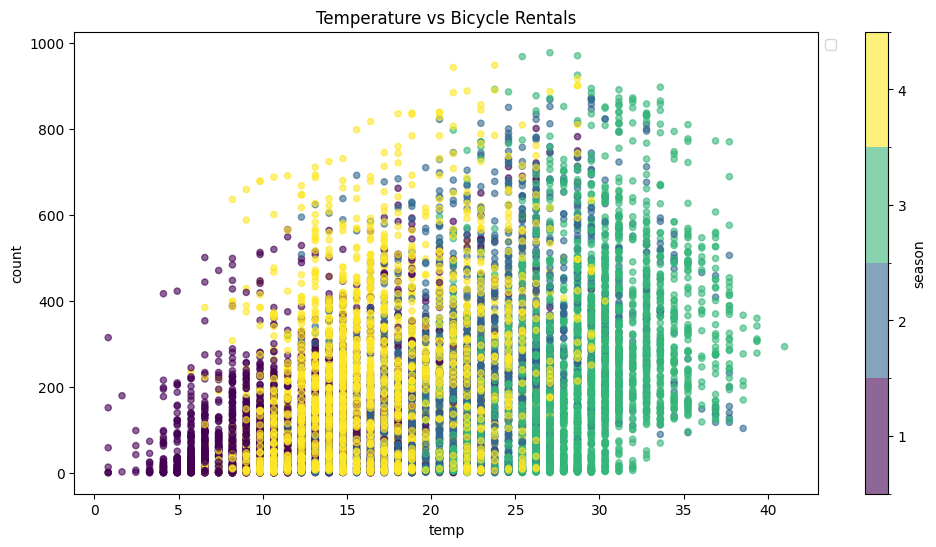

In [35]:
df['season'] = df['season'].astype('category')
ax = df.plot.scatter(x='temp', y='count', c='season',colormap='viridis',alpha=0.6,figsize=(12,6),title='Temperature vs Bicycle Rentals')
plt.show()

Судячи з цього графіку, звʼязок між температурою та кількістю оренди дійсно існує. "Зимові" точки здебільшого відповідають діапазону кількості заявок 0-200, тоді як з настанням весни і літа ця кількість зростає. Можна сказати, що 15-35 градусів за Цельсієм це найкомфортніша температура для користувачів даного сервісу, оскільки нижче та вище цієї температури кількість заявок стає не настільки високою (при цьому холод має більш негативний вплив ніж спека).

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

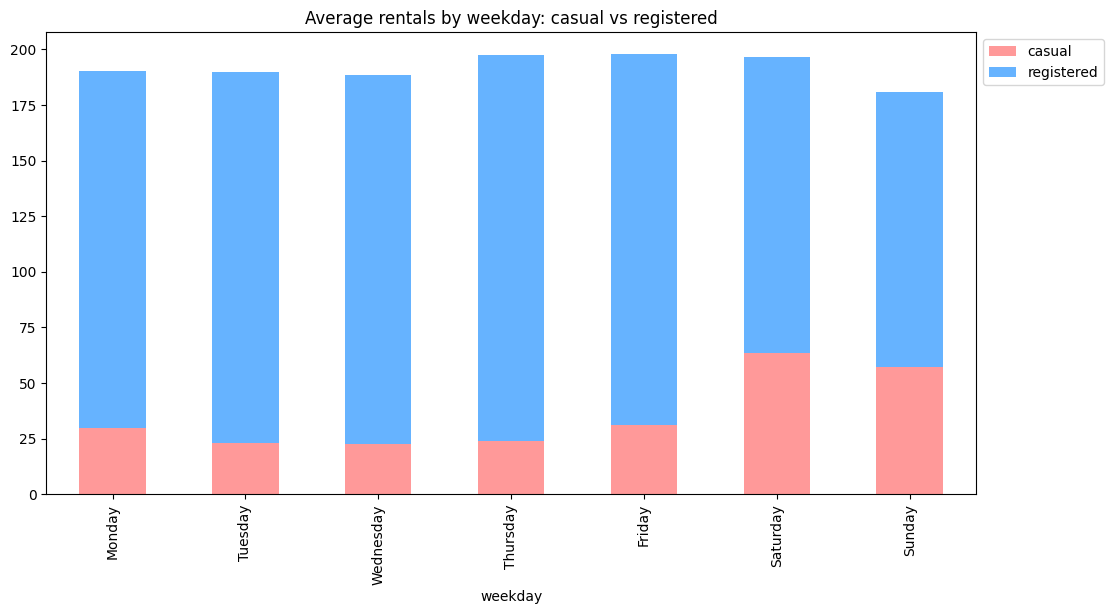

In [44]:
df_groupped_by_weekday = df.groupby(['weekday_num','weekday']).agg({'casual':'mean','registered':'mean'}).reset_index()
df_groupped_by_weekday = df_groupped_by_weekday.sort_values('weekday_num')
df_groupped_by_weekday = df_groupped_by_weekday.set_index('weekday')

ax = df_groupped_by_weekday[['casual','registered']].plot.bar(stacked=True, figsize=(12,6), color=['#ff9999', '#66b3ff'], title='Average rentals by weekday: casual vs registered')
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1)
)
plt.show()

З цього графіку видно, що частка не зареєстрованих користувачів, які користуються послугами сервісу, різко зростає в суботу та неділю. Можливо, в будні дні сервісом більше користуються люди, які постійно пересуваються на велосипеді (наприклад, їздять на роботу), а в вихідні - люди, які не потребують постійної підписки, але хочуть просто провести дозвілля за велосипедною прогулянкою.